In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

import time
start_time = time.time()
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [2]:
dataset = pd.read_excel("pcf_modeSoln_data_1.xlsx",sheet_name = 'SiO2-air-rings-5-dBYp-0.7')
datafile_1 = dataset.values                    ## stored data from xlsx file

In [3]:
dataset.shape

(140, 11)

In [4]:
sheets_names = ['SiO2-air-rings-4-dBYp-0.8', 'SiO2-air-rings-4-dBYp-0.9',
                'SiO2-air-rings-4-dBYp-0.7', 'SiO2-air-rings-5-dBYp-0.6',
                'SiO2-air-rings-5-dBYp-0.8', 'SiO2-air-rings-5-dBYp-0.9',
                'SiO2-air-rings-4-dBYp-0.6']
for sheet_name in sheets_names:
    print(sheet_name)
    df_sheet_name = pd.read_excel("pcf_modeSoln_data_1.xlsx", sheet_name=sheet_name)
    datafile_sheet_name = df_sheet_name.values 
    datafile_1 = np.concatenate((datafile_1, datafile_sheet_name), axis=0)

SiO2-air-rings-4-dBYp-0.8
SiO2-air-rings-4-dBYp-0.9
SiO2-air-rings-4-dBYp-0.7
SiO2-air-rings-5-dBYp-0.6
SiO2-air-rings-5-dBYp-0.8
SiO2-air-rings-5-dBYp-0.9
SiO2-air-rings-4-dBYp-0.6


In [5]:
print(datafile_1)
print()
print(len(datafile_1))

[[ 1.44400000e+00  1.00000000e+00  5.00000000e+00 ... -6.67351000e+02
   6.12700000e+01  1.78724788e+00]
 [ 1.44400000e+00  1.00000000e+00  5.00000000e+00 ... -7.28993000e+02
   8.27376000e+00  9.17702919e-01]
 [ 1.44400000e+00  1.00000000e+00  5.00000000e+00 ... -5.86632000e+02
   7.66277000e-01 -1.15614210e-01]
 ...
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00 ...  5.64126000e+01
   3.07385000e-12 -1.15123173e+01]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00 ...  5.48488000e+01
   2.18833000e-12 -1.16598872e+01]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00 ...  5.33584000e+01
   1.59437000e-12 -1.17974109e+01]]

1118


In [6]:
datafile_1.shape

(1118, 11)

In [7]:
print(type(datafile_1))

<class 'numpy.ndarray'>


In [8]:
datafile_1 = pd.DataFrame(datafile_1, columns = ['core-ref-index-at-wl-1.55um','clad-ref-index','no-of-\nrings','diaBYpitch'
                                          ,'pitch\n(um)','wl\n(um)','neff','Aeff\n(um^2)','dispersion\n(ps/km.nm)'
                                          ,'conf-loss\n(dB/cm)','conf-loss-in-log10\n(dB/cm)'])

In [9]:
datafile_1 = datafile_1.rename(columns = {'no-of-\nrings':'no-of-rings', 'pitch\n(um)':'pitch(um)','wl\n(um)':'wl(um)',
                              'Aeff\n(um^2)':'Aeff(um^2)', 'dispersion\n(ps/km.nm)':'dispersion(ps/km.nm)', 
                              'conf-loss\n(dB/cm)':'conf-loss(dB/cm)', 'conf-loss-in-log10\n(dB/cm)':'conf-loss-in-log10(dB/cm)'})

In [10]:
datafile_1

,core-ref-index-at-wl-1.55um,clad-ref-index,no-of-rings,diaBYpitch,pitch(um),wl(um),neff,Aeff(um^2),dispersion(ps/km.nm),conf-loss(dB/cm),conf-loss-in-log10(dB/cm)
0,1.444,1.0,5.0,0.7,0.8,1.800000,1.27882,4.42229,-667.3510,6.127000e+01,1.787248
1,1.444,1.0,5.0,0.7,0.8,1.583330,1.29642,2.41020,-728.9930,8.273760e+00,0.917703
2,1.444,1.0,5.0,0.7,0.8,1.413220,1.31464,1.67653,-586.6320,7.662770e-01,-0.115614
3,1.444,1.0,5.0,0.7,0.8,1.276120,1.33194,1.33156,-397.9290,6.112370e-02,-1.213790
4,1.444,1.0,5.0,0.7,0.8,1.163270,1.34753,1.13874,-230.0170,4.891870e-03,-2.310525
...,...,...,...,...,...,...,...,...,...,...,...
1113,1.444,1.0,4.0,0.6,2.0,0.589655,1.46354,4.06947,59.7799,6.578650e-12,-11.181863
1114,1.444,1.0,4.0,0.6,2.0,0.564356,1.46406,4.04679,58.0559,4.431390e-12,-11.353460
1115,1.444,1.0,4.0,0.6,2.0,0.541139,1.46453,4.02620,56.4126,3.073850e-12,-11.512317
1116,1.444,1.0,4.0,0.6,2.0,0.519757,1.46495,4.00741,54.8488,2.188330e-12,-11.659887


In [11]:
df = datafile_1
df  = df.drop(['conf-loss-in-log10(dB/cm)'],axis = 1)
df.shape

(1118, 10)

<Axes: >

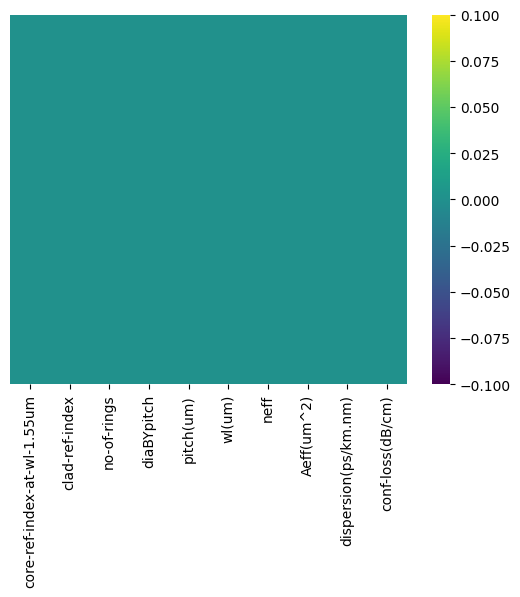

In [12]:
## create a heatmap of missing values in a Pandas DataFrame df.

sns.heatmap(df.isnull(),yticklabels =False,cbar =True,cmap = 'viridis')

In [13]:
df.nunique() # Returns the number of unique values for each column in a DataFrame.
df.shape

(1118, 10)

In [14]:
# computes the correlation between all pairs of columns in the DataFrame
df.corr()

,core-ref-index-at-wl-1.55um,clad-ref-index,no-of-rings,diaBYpitch,pitch(um),wl(um),neff,Aeff(um^2),dispersion(ps/km.nm),conf-loss(dB/cm)
core-ref-index-at-wl-1.55um,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clad-ref-index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no-of-rings,NaN,NaN,1.000000e+00,-9.357308e-16,-3.255873e-17,6.425909e-17,0.000034,-0.001482,-0.002360,-0.049619
diaBYpitch,NaN,NaN,-9.357308e-16,1.000000e+00,-3.613199e-03,5.931608e-03,-0.222592,-0.397827,0.187449,-0.055235
pitch(um),NaN,NaN,-3.255873e-17,-3.613199e-03,1.000000e+00,6.634419e-03,0.520613,0.792184,0.080793,-0.126025
wl(um),NaN,NaN,6.425909e-17,5.931608e-03,6.634419e-03,1.000000e+00,-0.715099,0.363323,-0.507209,0.186209
neff,NaN,NaN,3.370084e-05,-2.225920e-01,5.206127e-01,-7.150988e-01,1.000000,0.201410,0.630526,-0.251136
Aeff(um^2),NaN,NaN,-1.481759e-03,-3.978271e-01,7.921844e-01,3.633225e-01,0.201410,1.000000,-0.283547,0.161251
dispersion(ps/km.nm),NaN,NaN,-2.359762e-03,1.874486e-01,8.079335e-02,-5.072090e-01,0.630526,-0.283547,1.000000,-0.372032
conf-loss(dB/cm),NaN,NaN,-4.961942e-02,-5.523454e-02,-1.260246e-01,1.862091e-01,-0.251136,0.161251,-0.372032,1.000000


In [15]:
# computes summary statistics for each numerical column in the DataFrame 
df.describe()
df.shape

(1118, 10)

<Axes: >

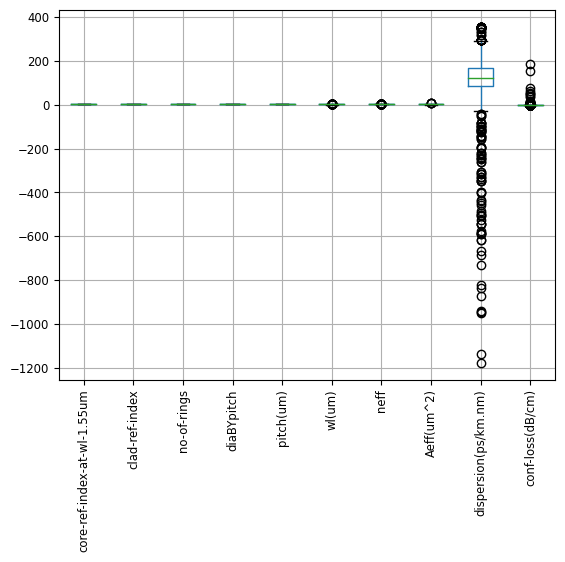

In [16]:
# Displays the distribution of a dataset by showing the median, quartiles, and outliers.

df.boxplot(fontsize='small',rot = 90)

In [17]:
df = df[(df["dispersion(ps/km.nm)"] > -1000) & (df["conf-loss(dB/cm)"] < 200)]

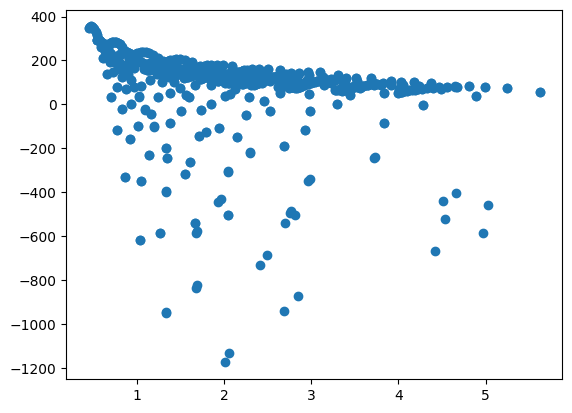

In [18]:
# Visualise the relationship between effective area and dispersion
plt.scatter(datafile_1['Aeff(um^2)'],datafile_1['dispersion(ps/km.nm)'])

<Axes: >

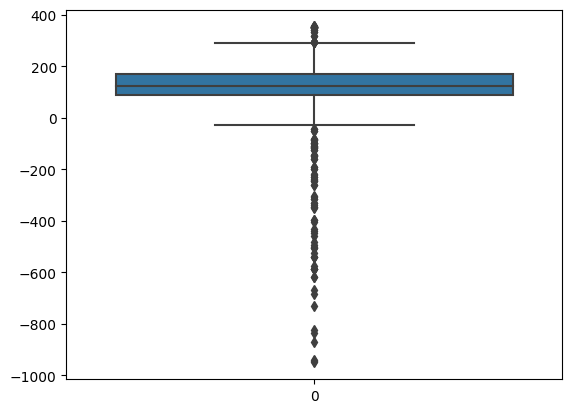

In [19]:
# Create a box plot of the "dispersion(ps/km.nm)" column
sns.boxplot(df["dispersion(ps/km.nm)"])

In [20]:
df25 = df["dispersion(ps/km.nm)"].quantile(0.25)
df75 = df["dispersion(ps/km.nm)"].quantile(0.75)

In [21]:
print(df75)
print(df25)

168.72275000000002
87.4481


In [22]:
# finding iqr(IterquartileRange)
iqr = df75-df25
iqr

81.27465000000002

In [23]:
upper_limit = df75+1.5*iqr
lower_limit = df25-1.5*iqr

In [24]:
print(upper_limit)
print(lower_limit)

290.63472500000006
-34.463875000000044


In [25]:
# Finding Outliers

In [26]:
# Select the rows where "dispersion(ps/km.nm)" is greater than the upper limit
df[df["dispersion(ps/km.nm)"]>upper_limit]

,core-ref-index-at-wl-1.55um,clad-ref-index,no-of-rings,diaBYpitch,pitch(um),wl(um),neff,Aeff(um^2),dispersion(ps/km.nm),conf-loss(dB/cm)
155,1.444,1.0,4.0,0.8,0.8,0.589655,1.42075,0.571591,293.274,9.030090e-13
156,1.444,1.0,4.0,0.8,0.8,0.564356,1.42439,0.562015,294.562,1.770850e-13
157,1.444,1.0,4.0,0.8,0.8,0.541139,1.42764,0.553460,294.691,3.700630e-14
158,1.444,1.0,4.0,0.8,0.8,0.519757,1.43056,0.545769,293.935,8.224210e-15
159,1.444,1.0,4.0,0.8,0.8,0.500000,1.43319,0.538816,292.504,1.939970e-15
289,1.444,1.0,4.0,0.9,0.8,0.806604,1.36974,0.563524,292.741,3.581450e-10
290,1.444,1.0,4.0,0.9,0.8,0.760000,1.37918,0.543928,315.845,2.723730e-11
291,1.444,1.0,4.0,0.9,0.8,0.718487,1.38736,0.527425,331.564,2.180920e-12
292,1.444,1.0,4.0,0.9,0.8,0.681275,1.39450,0.513323,342.017,1.835630e-13
293,1.444,1.0,4.0,0.9,0.8,0.647727,1.40075,0.501124,348.665,1.623390e-14


In [27]:
# Select the rows where "dispersion(ps/km.nm)" is less than the lower limit
df[df["dispersion(ps/km.nm)"]<lower_limit]

,core-ref-index-at-wl-1.55um,clad-ref-index,no-of-rings,diaBYpitch,pitch(um),wl(um),neff,Aeff(um^2),dispersion(ps/km.nm),conf-loss(dB/cm)
0,1.444,1.0,5.0,0.7,0.8,1.80000,1.27882,4.42229,-667.3510,61.270000
1,1.444,1.0,5.0,0.7,0.8,1.58333,1.29642,2.41020,-728.9930,8.273760
2,1.444,1.0,5.0,0.7,0.8,1.41322,1.31464,1.67653,-586.6320,0.766277
3,1.444,1.0,5.0,0.7,0.8,1.27612,1.33194,1.33156,-397.9290,0.061124
4,1.444,1.0,5.0,0.7,0.8,1.16327,1.34753,1.13874,-230.0170,0.004892
...,...,...,...,...,...,...,...,...,...,...
1000,1.444,1.0,4.0,0.6,1.0,1.41322,1.37353,2.29658,-218.5010,1.253040
1001,1.444,1.0,4.0,0.6,1.0,1.27612,1.38585,1.94467,-109.0200,0.195741
1018,1.444,1.0,4.0,0.6,1.2,1.80000,1.36595,3.72942,-238.1170,2.811610
1019,1.444,1.0,4.0,0.6,1.2,1.58333,1.38171,2.93302,-118.1000,0.294626


In [28]:
### Trimming

In [29]:
new_df = df[df["dispersion(ps/km.nm)"]>upper_limit]
new_df.shape

(32, 10)

In [30]:
### Capping

In [31]:
new_df_cap = df.copy()

new_df_cap["dispersion(ps/km.nm)"] = np.where(
new_df_cap["dispersion(ps/km.nm)"] >upper_limit,upper_limit,
np.where(
new_df_cap["dispersion(ps/km.nm)"] <lower_limit,lower_limit,
new_df_cap["dispersion(ps/km.nm)"])
)

In [32]:
new_df_cap.shape

(1116, 10)

In [33]:
### Comparing

<ipython-input-34-91edfb0b542d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["dispersion(ps/km.nm)"])
<ipython-input-34-91edfb0b542d>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap["dispersion(ps/km.nm)"])


<Axes: >

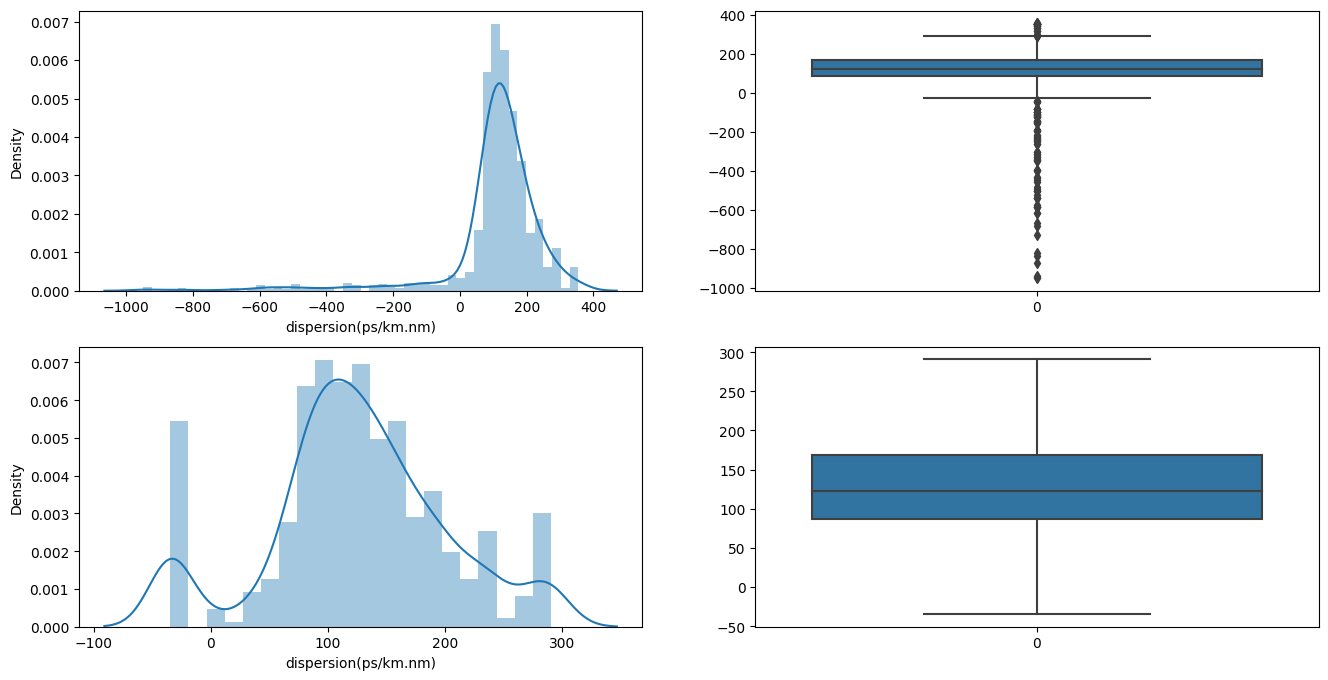

In [34]:
plt.figure(figsize= (16,8))
plt.subplot(2,2,1)
sns.distplot(df["dispersion(ps/km.nm)"])

plt.subplot(2,2,2)
sns.boxplot(df["dispersion(ps/km.nm)"])

plt.subplot(2,2,3)
sns.distplot(new_df_cap["dispersion(ps/km.nm)"])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap["dispersion(ps/km.nm)"])

In [35]:
df = new_df_cap
df=df.drop(['core-ref-index-at-wl-1.55um','clad-ref-index'],axis = 1)
col_to_shift = df.pop('dispersion(ps/km.nm)')

# concatenate the original DataFrame with the extracted column as the last column
df = pd.concat([df, col_to_shift], axis=1)
df

,no-of-rings,diaBYpitch,pitch(um),wl(um),neff,Aeff(um^2),conf-loss(dB/cm),dispersion(ps/km.nm)
0,5.0,0.7,0.8,1.800000,1.27882,4.42229,6.127000e+01,-34.463875
1,5.0,0.7,0.8,1.583330,1.29642,2.41020,8.273760e+00,-34.463875
2,5.0,0.7,0.8,1.413220,1.31464,1.67653,7.662770e-01,-34.463875
3,5.0,0.7,0.8,1.276120,1.33194,1.33156,6.112370e-02,-34.463875
4,5.0,0.7,0.8,1.163270,1.34753,1.13874,4.891870e-03,-34.463875
...,...,...,...,...,...,...,...,...
1113,4.0,0.6,2.0,0.589655,1.46354,4.06947,6.578650e-12,59.779900
1114,4.0,0.6,2.0,0.564356,1.46406,4.04679,4.431390e-12,58.055900
1115,4.0,0.6,2.0,0.541139,1.46453,4.02620,3.073850e-12,56.412600
1116,4.0,0.6,2.0,0.519757,1.46495,4.00741,2.188330e-12,54.848800


In [36]:
datafile_1 = df.values
datafile_1.shape
print(type(datafile_1))


<class 'numpy.ndarray'>


In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

scaler1 = MinMaxScaler()  
scaler2 = MinMaxScaler()  

no_of_output_nodes = 1
out_var_datafile_1 = datafile_1[:,7:8]              ## stored output_variable (4th column) from xlsx file
out_var_datafile_1 = out_var_datafile_1.reshape((-1,no_of_output_nodes))    ## one column with unknown no. of rows
print(out_var_datafile_1)
print('no. of training points: ', len(out_var_datafile_1))

[[-34.463875]
 [-34.463875]
 [-34.463875]
 ...
 [ 56.4126  ]
 [ 54.8488  ]
 [ 53.3584  ]]
no. of training points:  1116


In [38]:
import torch
from torch import nn, optim
df_2 = pd.read_excel('pcf_modeSoln_data_manual_1.xlsx', sheet_name='Sheet1')
datafile_2 = df_2.values                  ## stored data from xlsx file
print(datafile_2)
scaler1.fit(datafile_2)

scaler_datafile_2 = scaler1.transform(datafile_2)
X_test = scaler_datafile_2[:,range(0,7)]            ## input variables columns
y_test = scaler_datafile_2[:,range(7,8)]                     ## output variables columns
print(X_test)
print()
print(y_test)
print('no. of test points: ', len(X_test))
X_test = X_test.reshape(-1, )                      ## 2nd column value is = no. of input variables columns
y_test = y_test.reshape(-1, no_of_output_nodes)

[[ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  1.70000000e+00  1.38489000e+00  3.04184000e+00
   4.29646000e+01  1.54506000e-04 -3.81105465e+00]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  1.60000000e+00  1.39268000e+00  2.90433000e+00
   6.67628000e+01  3.24724000e-05 -4.48848561e+00]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  1.50000000e+00  1.40035000e+00  2.78024000e+00
   8.64249000e+01  6.02749000e-06 -5.21986350e+00]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  1.40000000e+00  1.40784000e+00  2.66742000e+00
   1.02097000e+02  9.78811000e-07 -6.00930116e+00]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  1.30000000e+00  1.41511000e+00  2.56412000e+00
   1.14007000e+02  1.37772000e-07 -6.86083904e+00]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  

In [39]:
scaler1.fit(datafile_1)
scaler2.fit(out_var_datafile_1)


scaler_datafile_1 = scaler1.transform(datafile_1)
X = scaler_datafile_1[:,range(0,7)]                 ## input variables columns
y = scaler_datafile_1[:,range(7,8)]                          ## output variables columns

print(X)
print()
print(y)


X, y = shuffle(X, y)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.1)
X_train = X_train.reshape(-1, 7)                                ## 2nd column value is = no. of input variables columns
y_train = y_train.reshape(-1, no_of_output_nodes)               ## 2nd column value is = no. of output variables columns
X_validation = X_validation.reshape(-1, 8)                      ## 2nd column value is = no. of input variables columns
y_validation = y_validation.reshape(-1, no_of_output_nodes)     ## 2nd column value is = no. of output variables columns
print('no. of training points: ', len(X_train))
print('no. of validation points: ', len(X_validation))


[[1.00000000e+00 3.33333333e-01 0.00000000e+00 ... 2.74911551e-01
  7.67823103e-01 3.30870838e-01]
 [1.00000000e+00 3.33333333e-01 0.00000000e+00 ... 3.43338128e-01
  3.78665116e-01 4.46800376e-02]
 [1.00000000e+00 3.33333333e-01 0.00000000e+00 ... 4.14175188e-01
  2.36766126e-01 4.13805636e-03]
 ...
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 9.96928580e-01
  6.91215403e-01 1.65994350e-14]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 9.98561487e-01
  6.87581232e-01 1.18174414e-14]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  6.84254583e-01 8.60993299e-15]]

[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.27953512]
 [0.27472488]
 [0.27014043]]
no. of training points:  1004
no. of validation points:  98


In [40]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
adam = optimizers.Adam(lr=0.001)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [41]:
import torch
from torch import nn, optim
no_of_output_nodes = 1

input_dim = 7                                       ## = no. of input variables columns
output_dim = no_of_output_nodes                     ## = no. of output variables columns
from collections import OrderedDict

dropout_prob = 0.0


In [42]:
import torch
from torch import nn, optim
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score



df_2 = pd.read_excel('pcf_modeSoln_data_manual_1.xlsx', sheet_name='Sheet1')
datafile_2 = df_2.values                  ## stored data from xlsx file
print(datafile_2)
scaler1.fit(datafile_2)

scaler_datafile_2 = scaler1.transform(datafile_2)
X_test = scaler_datafile_2[:,range(0,7)]            ## input variables columns
y_test = scaler_datafile_2[:,range(7,8)]                     ## output variables columns
print(X_test)
print()
print(y_test)
print('no. of test points: ', len(X_test))
X_test = X_test.reshape(-1, )                      ## 2nd column value is = no. of input variables columns
y_test = y_test.reshape(-1, no_of_output_nodes)

scaler1.fit(datafile_1)
scaler2.fit(out_var_datafile_1)


scaler_datafile_1 = scaler1.transform(datafile_1)
X = scaler_datafile_1[:,range(0,7)]                 ## input variables columns
y = scaler_datafile_1[:,range(7,8)]                          ## output variables columns

print(X)
print()
print(y)


X, y = shuffle(X, y)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.1, random_state=60)

# Check if X_train and X_validation have the same number of columns
if X_train.shape[1] != X_validation.shape[1]:
    # If not, remove the last column of X_validation
    X_validation = X_validation[:, :-1]

X_train = X_train.reshape(-1, 7)                                ## 2nd column value is = no. of input variables columns
y_train = y_train.reshape(-1, no_of_output_nodes)               ## 2nd column value is = no. of output variables columns
X_validation = X_validation.reshape(-1, 7)                      ## 2nd column value is = no. of input variables columns
y_validation = y_validation.reshape(-1, no_of_output_nodes)     ## 2nd column value is = no. of output variables columns
print('no. of training points: ', len(X_train))
print('no. of validation points: ', len(X_validation))

from sklearn.ensemble import RandomForestRegressor

# create an instance of RandomForestRegressor
dt = RandomForestRegressor()

# train the model on the training data
dt.fit(X_train, y_train)

# make predictions on the validation data
y_pred = dt.predict(X_validation)

# calculate the mean squared error between the predicted and actual values
mse = mean_squared_error(y_validation, y_pred)

# print the mean squared error
print('Mean squared error:', mse)

#
score = r2_score(y_validation, y_pred)
print('Accuracy:',score*100)


[[ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  1.70000000e+00  1.38489000e+00  3.04184000e+00
   4.29646000e+01  1.54506000e-04 -3.81105465e+00]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  1.60000000e+00  1.39268000e+00  2.90433000e+00
   6.67628000e+01  3.24724000e-05 -4.48848561e+00]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  1.50000000e+00  1.40035000e+00  2.78024000e+00
   8.64249000e+01  6.02749000e-06 -5.21986350e+00]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  1.40000000e+00  1.40784000e+00  2.66742000e+00
   1.02097000e+02  9.78811000e-07 -6.00930116e+00]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  1.30000000e+00  1.41511000e+00  2.56412000e+00
   1.14007000e+02  1.37772000e-07 -6.86083904e+00]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  

<ipython-input-42-a4084347718b>:57: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt.fit(X_train, y_train)


Mean squared error: 0.00028038505752408887
Accuracy: 99.46666076734171


In [43]:
from sklearn.utils import shuffle

X, y = shuffle(X, y)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2)
X_train = X_train.reshape(-1, 7)                                ## 2nd column value is = no. of input variables columns
y_train = y_train.reshape(-1, no_of_output_nodes)               ## 2nd column value is = no. of output variables columns
X_validation = X_validation.reshape(-1, 7)                      ## 2nd column value is = no. of input variables columns
y_validation = y_validation.reshape(-1, no_of_output_nodes)

epochs = 12000
# Convert numpy array to torch Variable
# inputs = torch.from_numpy(X_train).requires_grad_()
# labels = torch.from_numpy(y_train)
inputs = torch.Tensor((X_train))
labels = torch.Tensor((y_train))
print(inputs.shape,labels.shape)
inputs_validation = torch.Tensor((X_validation))
labels_validation = torch.Tensor((y_validation))
print(inputs_validation.shape)
print(labels_validation.shape)

torch.Size([892, 7]) torch.Size([892, 1])
torch.Size([224, 7])
torch.Size([224, 1])


In [44]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)


(892, 7)
(224, 7)
(70,)


In [45]:

predicted_on_X_train = dt.predict(X_train)
predicted_on_X_validation = dt.predict(X_validation)


In [46]:
X_test_reshaped = X_test.reshape(-1, 7)
predicted_on_X_test = dt.predict(X_test_reshaped)


o/p of test set:           
 [1.         0.84585463 0.70675276 0.58028428 0.46448749 0.35779302
 0.25892297 0.16685723 0.0807663  0.        ]
predicted o/p of test set: 
 [0.2210931  0.05462806 0.05462806 0.05462806 0.05462806 0.05462806
 0.05462806 0.05462806 0.07733778 0.1548795 ]
mse_test_set:  0.22725414848511644


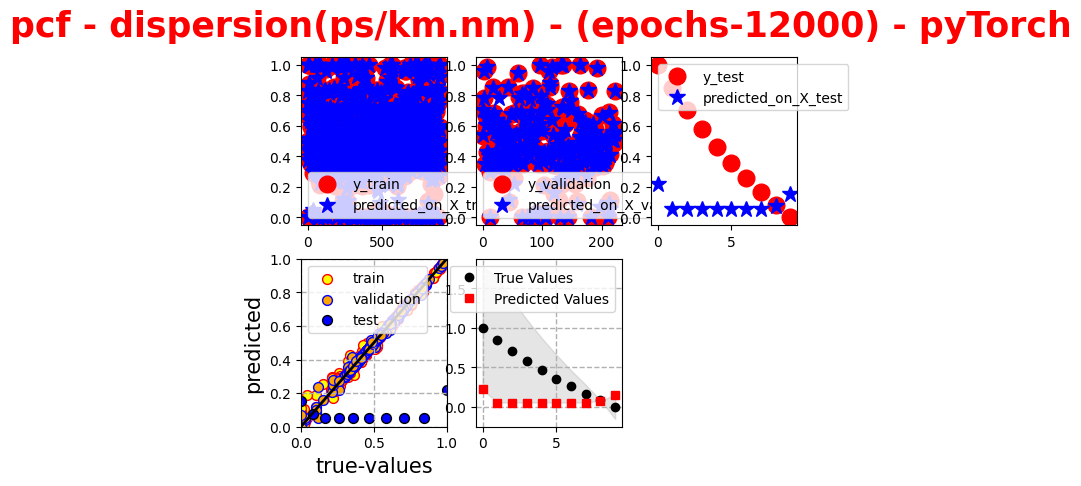

In [47]:
plt.figure()
plt.suptitle('pcf - dispersion(ps/km.nm) - (epochs-{}) - pyTorch'.format(epochs), fontsize=25, 
                color='r', fontweight='bold')  
plt.subplot(231)
predicted_on_X_train = predicted_on_X_train.reshape(-1, 1)

plt.plot((y_train)[:,0], 'ro', markersize=12, label='y_train')
plt.plot((predicted_on_X_train)[:,0], 'b*', markersize=12, label='predicted_on_X_train')

# Legend and plot
plt.legend(loc='best', fontsize=10)

plt.subplot(232)
plt.plot((y_validation)[:, 0], 'ro', markersize=12, label='y_validation')
plt.plot(predicted_on_X_validation.reshape(-1, no_of_output_nodes)[:, 0], 'b*', markersize=12, label='predicted_on_X_validation')
plt.legend(loc='best', fontsize=10)

plt.subplot(233)
plt.plot((y_test)[:,0], 'ro', markersize=12, label='y_test')
# Plot predictions
plt.plot(predicted_on_X_test.reshape(-1, no_of_output_nodes)[:, 0], 'b*', markersize=12, label='predicted_on_X_test')
# Legend and plot
plt.legend(loc='best', fontsize=10)

plt.subplot(234)
xx = (y_train)[:,0]
yy = (predicted_on_X_train)[:,0]
xx_validation = (y_validation)[:,0]
yy_validation = predicted_on_X_validation.reshape(-1, no_of_output_nodes)[:, 0]
xx_test = (y_test)[:,0]
yy_test = predicted_on_X_test.reshape(-1, no_of_output_nodes)[:, 0]
bubble_plot_line_x1y1 = [min(np.minimum(xx,yy)), max(np.maximum(xx,yy))]
bubble_plot_line_x2y2 = [min(np.minimum(xx,yy)), max(np.maximum(xx,yy))]
plt.xlim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.ylim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.plot(bubble_plot_line_x1y1, bubble_plot_line_x2y2, 'k-', linewidth=2)
plt.grid(linestyle='--', linewidth=1)
plt.scatter(xx, yy, label='train', marker='o', facecolors='yellow', edgecolors='red', s=50)
plt.scatter(xx_validation, yy_validation, label='validation', marker='o', facecolors='orange', edgecolors='blue', s=50)
plt.scatter(xx_test, yy_test, label='test', marker='o', facecolors='blue', edgecolors='black', s=50)
plt.legend(loc='best', fontsize=10)
plt.xlabel('true-values', fontsize=15)
plt.ylabel('predicted', fontsize=15)

plt.subplot(235)
true_values = (y_test)[:,0]
predicted_values = predicted_on_X_test.reshape(-1, no_of_output_nodes)[:, 0]
x_index = [i for i in range(len(true_values))]
error_values = predicted_values - true_values


plt.plot(x_index, true_values, 'o', color='black', label='True Values')
plt.plot(x_index, predicted_values, 's', color='red', label='Predicted Values')
plt.fill_between(x_index, true_values-error_values, true_values+error_values, color='gray', alpha=0.2)
plt.legend()
plt.grid(linestyle='--', linewidth=1)


print()
print("o/p of test set:           \n", ((y_test)[:,0]))
print("predicted o/p of test set: \n", (predicted_on_X_test.reshape(-1, no_of_output_nodes)[:, 0]))
print("mse_test_set: ", mean_squared_error(y_test, predicted_on_X_test))